In [1]:
import sys
sys.path.append("../../../")

## 数据

In [2]:
from pylib.utils.functions_for_regression import nonlin_data, plot_scatter
import matplotlib.pyplot as plt

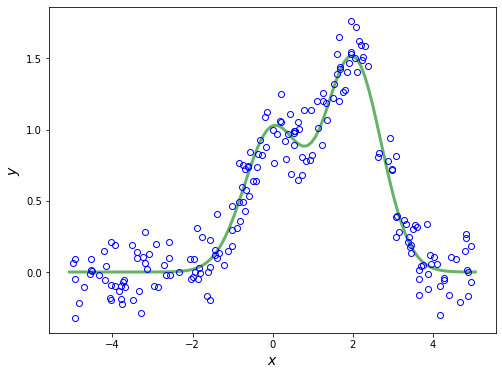

In [3]:
X_train, y_train, X_test, y_test, f_truth= nonlin_data(300)
plt.figure(figsize=(8, 6))
plot_scatter(X_train, y_train, f=f_truth)
plt.show()

## 连续逐段线性

In [4]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [5]:
x = X_train.copy()
y = y_train.copy().reshape(-1, 1)
# 设置分割点xi
xi1 = -2
xi2 = 0.1
xi3 = 0.8
xi4 = 2.1

# 分割变量
x1 = np.ones(len(x))
x2 = x
x3 = np.where(x < xi1, 0, x - xi1)
x4 = np.where(x < xi2, 0, x - xi2)
x5 = np.where(x < xi3, 0, x - xi3)
x6 = np.where(x < xi4, 0, x - xi4)

X = np.c_[x1, x2, x3, x4, x5, x6]  # 组成基矩阵

In [6]:
Beta = np.linalg.inv(X.T @ X).dot(X.T).dot(y)
Beta

array([[-0.06225273],
       [-0.00862066],
       [ 0.49880905],
       [-0.54232362],
       [ 0.37391984],
       [-0.95007506]])

In [7]:
y_pred = X @ Beta
train_err = mean_squared_error(y, y_pred)
print("训练样本误差: {:.3f}".format(train_err)) # 均方差

训练样本误差: 0.045


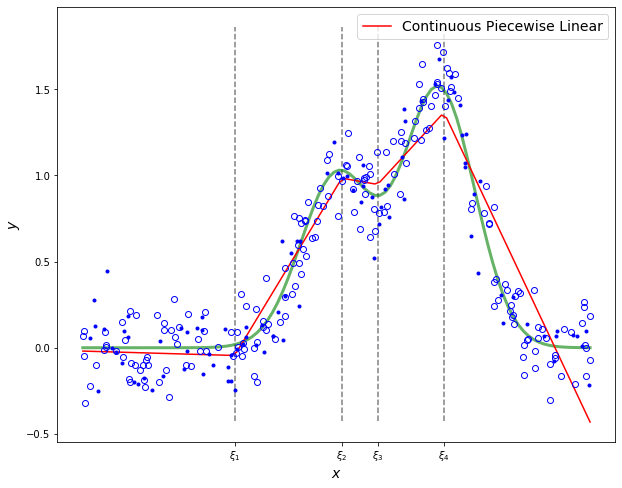

In [8]:
# 绘制拟合线
xn = np.linspace(x.min(), x.max(), 100)
xn1 = np.ones(len(xn))
xn2 = xn
xn3 = np.where(xn < xi1, 0, xn - xi1)
xn4 = np.where(xn < xi2, 0, xn - xi2)
xn5 = np.where(xn < xi3, 0, xn - xi3)
xn6 = np.where(xn < xi4, 0, xn - xi4)
Xn = np.c_[xn1, xn2, xn3, xn4, xn5, xn6]
yn_pred = Xn @ Beta

plt.figure(figsize=(10, 8))
plot_scatter(X_train, y_train, X_test, y_test, f=f_truth)
ylim_min = plt.ylim()[0]
ylim_max = plt.ylim()[1]
plt.vlines(xi1, ylim_min, ylim_max, linestyles='--', colors='gray')
plt.vlines(xi2, ylim_min, ylim_max, linestyles='--', colors='gray')
plt.vlines(xi3, ylim_min, ylim_max, linestyles='--', colors='gray')
plt.vlines(xi4, ylim_min, ylim_max, linestyles='--', colors='gray')
plt.plot(xn, yn_pred, 'r', label="Continuous Piecewise Linear")
plt.xticks(ticks=[xi1, xi2, xi3, xi4],
           labels=[r'$\xi_1$', r'$\xi_2$', r'$\xi_3$', r'$\xi_4$'])
plt.legend(fontsize=14)
plt.show()